<a href="https://colab.research.google.com/github/vaishnovrg/Topic_classification_prediction_service/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install nltk
!pip install sklearn

In [48]:
import csv
reviews = [row for row in csv.reader(open('Context.csv'))]

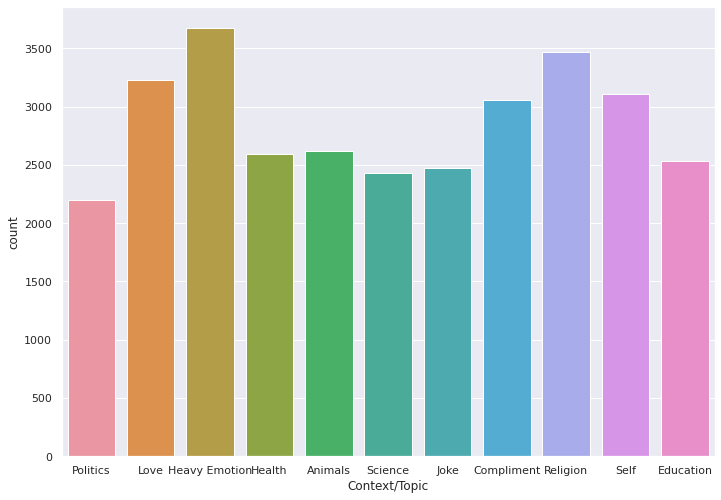

In [49]:
from pandas import read_csv
from seaborn import countplot
from matplotlib import pyplot
import seaborn as sns
from warnings import filterwarnings

df = read_csv('Context.csv')

df.head()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='Context/Topic', data = df)

In [50]:
df.isna().sum()

Text             0
Context/Topic    0
dtype: int64

In [51]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def process_text(text):
    text = re.sub('[^A-Za-z0-9]', ' ', text.lower())

    tokenized_text = word_tokenize(text)

    clean_text = [
        lemmatizer.lemmatize(word) for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
reviews = reviews[1:]

texts = [row[0] for row in reviews]
topics = [row[1] for row in reviews]

texts = [" ".join(process_text(text)) for text in texts]

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
vectors =  tf.fit_transform(texts)

import joblib
joblib.dump(tf, 'tf.pkl') 

['tf.pkl']

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print('---',topics)
le.fit(topics)
list(le.classes_)
topics = le.transform(topics)
print(topics)
joblib.dump(le, 'le.pkl')

--- ['Politics', 'Love', 'Heavy Emotion', 'Health', 'Animals', 'Animals', 'Science', 'Joke', 'Health', 'Science', 'Compliment', 'Religion', 'Science', 'Joke', 'Health', 'Self', 'Joke', 'Religion', 'Heavy Emotion', 'Heavy Emotion', 'Education', 'Heavy Emotion', 'Love', 'Love', 'Education', 'Compliment', 'Joke', 'Religion', 'Health', 'Self', 'Animals', 'Love', 'Love', 'Compliment', 'Compliment', 'Joke', 'Animals', 'Politics', 'Heavy Emotion', 'Joke', 'Love', 'Education', 'Joke', 'Animals', 'Heavy Emotion', 'Religion', 'Animals', 'Health', 'Love', 'Joke', 'Compliment', 'Science', 'Religion', 'Religion', 'Education', 'Religion', 'Joke', 'Animals', 'Religion', 'Health', 'Religion', 'Self', 'Education', 'Heavy Emotion', 'Self', 'Health', 'Animals', 'Health', 'Self', 'Love', 'Love', 'Politics', 'Heavy Emotion', 'Joke', 'Compliment', 'Compliment', 'Politics', 'Self', 'Education', 'Joke', 'Religion', 'Politics', 'Love', 'Religion', 'Self', 'Love', 'Love', 'Religion', 'Joke', 'Joke', 'Health', '

['le.pkl']

In [56]:
from sklearn.model_selection import train_test_split
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics)

from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority', random_state=8, n_neighbors=3)
X_resampled, y_resampled = ada.fit_resample(vectors_train, topics_train,)

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',solver ='newton-cg',random_state=0).fit(X_resampled, y_resampled)
topics_pred = clf.predict(vectors_test)

from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       652
           1       0.73      0.66      0.69       759
           2       0.72      0.64      0.68       637
           3       0.66      0.61      0.63       657
           4       0.53      0.63      0.57       852
           5       0.74      0.64      0.69       621
           6       0.62      0.57      0.59       823
           7       0.54      0.87      0.66       546
           8       0.76      0.71      0.73       896
           9       0.57      0.58      0.58       585
          10       0.57      0.51      0.54       819

    accuracy                           0.64      7847
   macro avg       0.65      0.65      0.65      7847
weighted avg       0.65      0.64      0.64      7847



In [ ]:
import joblib
# now you can save it to a file
joblib.dump(clf, 'model.pkl') 